# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [20]:
# Write your code here
import os
import tweepy as tw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

In [21]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [22]:
def generateLemmatized(X):
    eng_stop_word_list = stopwords.words("english")
    stemmer = WordNetLemmatizer()
    bag_of_words = []
    for sen in range(0, len(X)):
        # removing special characters from tweets
        doc = re.sub(r'\W', ' ', str(X[sen]))

        doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
        # changing multiple null characters(white space) to single
        doc = re.sub(r'\s+', ' ', doc, flags=re.I)
        # removing the 'b' prefix
        doc = re.sub(r'^b\s+', '', doc)
        # removing numerics
        doc = re.sub(r'\d+','',doc)
        # converting uppercase to lower
        doc = doc.lower()
        # Splits the clean reviews into a list of words, and subsequently added to a bag after processing
        doc = doc.split()
        doc = [stemmer.lemmatize(word) for word in doc]
        doc = [word for word in doc if word not in eng_stop_word_list]
        doc = ' '.join(doc)
        doc = " ".join(word for word in nltk.wordpunct_tokenize(doc) if word.lower() in words or not word.isalpha())
        #Bag of words
        bag_of_words.append(doc)
    
    return bag_of_words

data_df = pd.read_csv('Top_1000_tweets.csv')

cleaned_reviews  = generateLemmatized(data_df["Tweet"])
print(len(cleaned_reviews))
print(cleaned_reviews)

10000
['equality diversity inclusion legal service project management research marketing technology call', 'wrong grace nothing bad happen black black continent amin ase', '', 'ding ding ding ding ding ding ding ding ding ding ding', 'black people black people monolith crucify anyone think way typical black medium fed liberal', 'two political party long since political ideological role joe lovingly holding hand chapter leader', 'great still enough elect woman better yet elect black native woman really going dream let elect black native woman health care professional', 'college board advanced placement study course education k', 'see change wake morning ask life worth give crack hell care penitentiary filled black interesting black man told black', '', 'yes someone idea think write', 'every major release explain anyone office', 'video black life matter', '', 'rap music symbol hate every song murder mass murder plot', 'incredible', 'want learn campaign demilitarize campus police departme

In [23]:
data_df

,Unnamed: 0,User-id,Tweet
0,0,sankofa_ltd,"#Equality, #Diversity &amp; #Inclusion In #Leg..."
1,1,Olabisikh,@iamrizyyyy @Kitty21katt This is So Wrong.\nBy...
2,2,blackdeath360,#BlackLivesMatter https://t.co/GkfBxo1VbK
3,3,OldMainBell,"ding ding. Ding. ding, ding ding ding! ding &a..."
4,4,missmartaaay,"Black people are all ""Black people are NOT a m..."
...,...,...,...
9995,9995,TechPixies,#BlackHistoryMonth “is time to celebrate the c...
9996,9996,jornnielsen6,@0nelowdodge @someideasare @RealCandaceO When ...
9997,9997,zaphod67,@w_terrence Why we say #BlackLivesMatter https...
9998,9998,ReneNow,Still no going to buy that Maggie horse shit s...


In [24]:
words = [word for word in cleaned_reviews if str(word) != 'nan' and str(word) != '']
print(words)
list_of_words = []
for word in words:
    [list_of_words.append(val) for val in word.split(' ')]

words_str = ''
for word in list_of_words:
    words_str += word + ' '
    
print(words_str)

['equality diversity inclusion legal service project management research marketing technology call', 'wrong grace nothing bad happen black black continent amin ase', 'ding ding ding ding ding ding ding ding ding ding ding', 'black people black people monolith crucify anyone think way typical black medium fed liberal', 'two political party long since political ideological role joe lovingly holding hand chapter leader', 'great still enough elect woman better yet elect black native woman really going dream let elect black native woman health care professional', 'college board advanced placement study course education k', 'see change wake morning ask life worth give crack hell care penitentiary filled black interesting black man told black', 'yes someone idea think write', 'every major release explain anyone office', 'video black life matter', 'rap music symbol hate every song murder mass murder plot', 'incredible', 'want learn campaign demilitarize campus police department join u next th 

In [25]:
import nltk
nltk.download('punkt')
token_list = nltk.word_tokenize(words_str)
res_trigrams = nltk.trigrams(token_list)
freq_trigrams = nltk.FreqDist(res_trigrams)
freq_trigrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({('ding', 'ding', 'ding'): 757, ('black', 'life', 'matter'): 199, ('white', 'life', 'matter'): 124, ('hypocrisy', 'share', 'please'): 81, ('music', 'love', 'peace'): 53, ('need', 'good', 'read'): 37, ('repair', 'damage', 'country'): 36, ('damage', 'country', 'ha'): 36, ('country', 'ha', 'still'): 36, ('ha', 'still', 'upon'): 36, ...})

In [26]:
from nltk.util import ngrams
import collections
token_bigram = nltk.word_tokenize(words_str)
bigrams = ngrams(token_bigram,2)
bigramDist = nltk.FreqDist(bigrams)
singleWord_dist = nltk.FreqDist([word for word in words_str.split(' ')])

for w1,w2 in bigramDist:
    count_w1_w2 = bigramDist[(w1,w2)]
    count_w1 = singleWord_dist[w1]
    if(count_w1 != 0):
        print(w1,w2,(count_w1_w2/count_w1))

ding ding 0.8468720821661998
life matter 0.6
black life 0.20182094081942337
black people 0.1676783004552352
white life 0.24629080118694363
white people 0.12462908011869436
hypocrisy share 0.7788461538461539
share please 0.627906976744186
music love 0.5612244897959183
love peace 0.20300751879699247
black man 0.032625189681335355
give u 0.3684210526315789
say name 0.10610079575596817
good read 0.1625
need good 0.11377245508982035
la de 0.2331288343558282
country ha 0.2846153846153846
justice peace 0.3274336283185841
repair damage 0.9473684210526315
damage country 0.8372093023255814
ha still 0.12244897959183673
still upon 0.15319148936170213
upon black 0.7659574468085106
people century 0.045
century give 0.6923076923076923
u owe 0.10909090909090909
owe reparation 0.9473684210526315
reparation justice 0.18848167539267016
new york 0.17733990147783252
black community 0.026555386949924126
matter shirt 0.06108202443280977
protester watch 0.3434343434343434
black men 0.025796661608497723
look l

security black 0.21052631578947367
power black 0.06666666666666667
porter twin 0.5
twin daughter 0.5714285714285714
protester ground 0.04040404040404041
stop black 0.027777777777777776
episode fresh 0.08
resist via 0.04
like white 0.007547169811320755
tell u 0.04597701149425287
u know 0.012121212121212121
day project 0.021164021164021163
think would 0.018518518518518517
basketball game 0.5714285714285714
audio racist 0.25
baton watch 0.5
long time 0.07407407407407407
time ago 0.014184397163120567
prod record 0.4
record right 0.16
reserved turnup 0.6666666666666666
boy turnup 0.05333333333333334
present new 0.2222222222222222
prod year 0.4
year release 0.025
date later 0.2
later turnup 0.2
rap record 0.08695652173913043
problem ha 0.056338028169014086
another black 0.039603960396039604
matter every 0.006980802792321117
day good 0.021164021164021163
world knowledge 0.0392156862745098
knowledge hand 0.3076923076923077
hand site 0.0784313725490196
black fear 0.0030349013657056147
fear poli

work permit 0.02631578947368421
collateral damage 1.0
new benefit 0.014778325123152709
benefit package 0.21428571428571427
really matter 0.015957446808510637
gas watch 0.07692307692307693
bad wa 0.038461538461538464
book appointment 0.05454545454545454
always matter 0.022058823529411766
would take 0.013452914798206279
ha become 0.01020408163265306
justice community 0.02654867256637168
healthy life 0.5
racist equality 0.007481296758104738
politics democrat 0.06818181818181818
democrat racism 0.0234375
anyone like 0.033707865168539325
right life 0.011811023622047244
al en 0.08823529411764706
want get 0.013452914798206279
watch oh 0.012711864406779662
oh gosh 0.030303030303030304
know like 0.010416666666666666
de west 0.008620689655172414
ding hey 0.0028011204481792717
back scam 0.019867549668874173
hundred year 0.2727272727272727
like child 0.005660377358490566
time anything 0.010638297872340425
thought exactly 0.04411764705882353
got black 0.01875
name smith 0.02830188679245283
thought 

saying hurt 0.018691588785046728
yes ha 0.017857142857142856
secret service 0.11764705882352941
nothing hate 0.0273972602739726
black shot 0.0015174506828528073
sure check 0.028985507246376812
check latest 0.037037037037037035
need act 0.005988023952095809
see work 0.008130081300813009
work following 0.017543859649122806
traffic stop 0.4
unfair treatment 0.5
replace walker 0.3333333333333333
walker ye 0.15384615384615385
race vote 0.01694915254237288
vote democracy 0.017543859649122806
maybe get 0.04081632653061224
get let 0.005988023952095809
matter colour 0.0034904013961605585
wa used 0.0032414910858995136
glad officer 0.09523809523809523
officer got 0.037037037037037035
got fired 0.0125
fired need 0.125
point quickly 0.02702702702702703
quickly fired 0.5
fired officer 0.125
officer due 0.037037037037037035
due victim 0.1111111111111111
black protest 0.0015174506828528073
go week 0.0106951871657754
week maybe 0.0273972602739726
maybe month 0.04081632653061224
month finally 0.03703703

un shirt 0.017857142857142856
truly hope 0.07142857142857142
woman stop 0.009389671361502348
time take 0.0070921985815602835
black panther 0.0015174506828528073
blanc un 0.2222222222222222
sense entitlement 0.0625
entitlement ha 0.6666666666666666
ha self 0.006802721088435374
someone tell 0.028985507246376812
personal experience 0.09523809523809523
ding yeah 0.0018674136321195146
red flag 0.14285714285714285
know real 0.006944444444444444
real one 0.020202020202020204
whole time 0.0392156862745098
time need 0.0070921985815602835
know check 0.006944444444444444
check movie 0.037037037037037035
movie actually 0.025
actually interesting 0.034482758620689655
interesting much 0.1111111111111111
much intriguing 0.014184397163120567
feeling weather 0.07407407407407407
one last 0.0053475935828877
last thing 0.029850746268656716
leave absence 0.08
beautiful black 0.06666666666666667
cause way 0.02702702702702703
talking point 0.044444444444444446
arrest woman 0.09090909090909091
need wa 0.00598

good bon 0.008333333333333333
much anger 0.014184397163120567
people monkey 0.0025
monkey democrat 0.16666666666666666
people could 0.0025
like matter 0.0037735849056603774
world ha 0.0196078431372549
u old 0.006060606060606061
public library 0.09523809523809523
via holiday 0.018691588785046728
movie jordan 0.025
people said 0.0025
tell going 0.022988505747126436
bad republican 0.02564102564102564
absolutely nothing 0.05714285714285714
attention seeker 0.05405405405405406
de pueblo 0.005747126436781609
hair make 0.1
north south 0.125
slavery th 0.041666666666666664
name movement 0.018867924528301886
ye say 0.013605442176870748
say th 0.005305039787798408
manic episode 1.0
dangerous society 0.08695652173913043
record need 0.08
de matter 0.005747126436781609
matter never 0.0034904013961605585
made poor 0.02197802197802198
church ding 0.10526315789473684
hypocrisy left 0.019230769230769232
ya go 0.047619047619047616
u every 0.006060606060606061
come humanity 0.02127659574468085
guess care

racism_against_blacks spy 0.6666666666666666
spy drug 0.4
addiction crime 0.4
president must 0.06451612903225806
better today 0.021739130434782608
like going 0.0037735849056603774
every damn 0.015384615384615385
sun protester 0.04
stand together 0.024390243902439025
actually read 0.034482758620689655
still would 0.00851063829787234
would free 0.008968609865470852
autistic people 1.0
many activist 0.016129032258064516
people time 0.0025
something bad 0.020202020202020204
people ad 0.0025
citizen sanity 0.125
voice actor 0.045454545454545456
completely lost 0.16666666666666666
lost mind 0.08
st st 0.058823529411764705
book booklover 0.03636363636363636
obvious wa 0.08695652173913043
privilege doe 0.09523809523809523
people live 0.0025
regardless skin 0.16666666666666666
area guy 0.25
guy seen 0.024096385542168676
seen new 0.05405405405405406
new action 0.009852216748768473
action figure 0.043478260869565216
figure mansion 0.11764705882352941
way life 0.013157894736842105
poster child 0.2

said best 0.015625
divide people 0.15384615384615385
sad angry 0.05714285714285714
dit de 0.18181818181818182
lady wa 0.06666666666666667
getting stuck 0.02666666666666667
stuck time 0.25
new place 0.009852216748768473
dit nu 0.18181818181818182
te het 0.06060606060606061
net zo 0.4
angry racist 0.08333333333333333
racist life 0.004987531172069825
matter fact 0.0034904013961605585
talk new 0.03333333333333333
past present 0.08
refugee burnt 0.2222222222222222
burnt death 1.0
death let 0.047619047619047616
game black 0.041666666666666664
really feel 0.010638297872340425
racist yeah 0.004987531172069825
yeah dear 0.03278688524590164
join talk 0.06896551724137931
protest watch 0.025974025974025976
family member 0.01818181818181818
systematic racism 0.6666666666666666
art piece 0.044444444444444446
wa special 0.0032414910858995136
racism embarrassing 0.006872852233676976
made one 0.02197802197802198
death many 0.047619047619047616
century life 0.038461538461538464
movie look 0.025
hope lif

like crap 0.0037735849056603774
die police 0.0392156862745098
custody like 0.3333333333333333
every black 0.015384615384615385
people much 0.0025
oh sweet 0.020202020202020204
wicked sore 0.6666666666666666
eric garner 0.3333333333333333
restitution black 1.0
matter care 0.0034904013961605585
reparation uproar 0.010471204188481676
uproar paying 0.6666666666666666
reparation tasteless 0.010471204188481676
tasteless royal 0.6666666666666666
royal theft 0.07142857142857142
theft black 0.6666666666666666
black linger 0.0015174506828528073
linger pain 1.0
pain suffering 0.13333333333333333
former county 0.11764705882352941
sheriff mike 0.2222222222222222
news center 0.019417475728155338
center independent 0.14285714285714285
independent curator 0.3333333333333333
curator international 1.0
international announce 0.16666666666666666
announce state 0.3333333333333333
state becoming 0.02857142857142857
becoming opening 0.25
freedom equality 0.023529411764705882
people pretend 0.0025
really like

word black 0.013513513513513514
black capital 0.0007587253414264037
capital universal 0.2
universal capitalize 0.2
capitalize show 0.5
show far 0.009174311926605505
go wound 0.0053475935828877
wound stunt 0.5
stunt deform 0.09090909090909091
deform rest 1.0
may find 0.010309278350515464
peace therapy 0.007633587786259542
therapy never 0.16666666666666666
whole unfettered 0.0196078431372549
unfettered human 1.0
human sat 0.013157894736842105
police clear 0.002824858757062147
clear justice 0.05555555555555555
justice center 0.008849557522123894
center protester 0.07142857142857142
protester impact 0.010101010101010102
munition stun 0.16666666666666666
watch hugely 0.00423728813559322
hugely important 1.0
important legacy 0.017241379310344827
legacy ha 0.125
culture still 0.024390243902439025
keep focus 0.00980392156862745
focus equality 0.1111111111111111
equality inequality 0.011627906976744186
inequality iris 0.058823529411764705
iris apparently 1.0
apparently like 0.1111111111111111
l

book cat 0.01818181818181818
cat hot 0.07142857142857142
hot doctor 0.1
doctor waffle 0.1
waffle entire 1.0
holder spooky 0.5
spooky black 0.2
matter hoodie 0.0017452006980802793
hoodie black 0.3333333333333333
gay recover 0.034482758620689655
recover k 0.5
k two 0.025
two fascist 0.015873015873015872
fascist supporter 0.0625
supporter lie 0.1111111111111111
lie center 0.013333333333333334
center man 0.07142857142857142
man guilty 0.005291005291005291
guilty insurance 0.025
fraud staging 0.03125
staging politically 1.0
politically arson 0.2
arson attack 0.5
attack join 0.041666666666666664
join powerful 0.034482758620689655
powerful platform 0.045454545454545456
platform opening 0.041666666666666664
opening session 0.2
session stand 0.14285714285714285
conference institute 0.06666666666666667
education register 0.03571428571428571
place entire 0.019230769230769232
holder trumpeter 0.5
trumpeter cancel 0.041666666666666664
cancel trump 0.09090909090909091
trump voice 0.00961538461538461

significant day 0.3333333333333333
day inspirational 0.005291005291005291
inspirational cancer 0.1
cancer yang 0.14285714285714285
yang good 0.125
morning old 0.018867924528301886
old new 0.016666666666666666
new another 0.0049261083743842365
another fresh 0.009900990099009901
fresh day 0.038461538461538464
day opportunity 0.005291005291005291
opportunity change 0.058823529411764705
change life 0.017543859649122806
life fixed 0.0013698630136986301
fixed match 0.2
match winning 0.16666666666666666
winning keita 0.14285714285714285
keita covid 1.0
covid proof 0.014492753623188406
proof rick 0.058823529411764705
rick ross 0.3333333333333333
ross wrong 0.5
wrong suing 0.017543859649122806
suing business 0.25
owner video 0.09090909090909091
video yang 0.009433962264150943
yang black 0.125
beauty left 0.1
left hand 0.02702702702702703
hand know 0.0196078431372549
hand ha 0.0196078431372549
ha sinister 0.003401360544217687
sinister agenda 0.3333333333333333
agenda yang 0.05
yang show 0.125
pe

focus blackness 0.1111111111111111
blackness back 0.045454545454545456
history child 0.00909090909090909
child listen 0.010526315789473684
listen confused 0.041666666666666664
actually rather 0.017241379310344827
rather simple 0.07142857142857142
simple u 0.043478260869565216
u treasury 0.0030303030303030303
treasury go 1.0
go hard 0.0053475935828877
hard quarter 0.022222222222222223
quarter bill 0.5
bill guess 0.09090909090909091
guess doe 0.037037037037037035
support know 0.007142857142857143
know organization 0.003472222222222222
taken people 0.05555555555555555
people money 0.00125
money benefit 0.009174311926605505
benefit people 0.07142857142857142
like burned 0.0018867924528301887
burned city 0.1
city yo 0.010752688172043012
yo shot 0.1
shot yo 0.017857142857142856
yo beat 0.1
beat basketball 0.041666666666666664
game unacceptable 0.020833333333333332
unacceptable anyone 0.16666666666666666
knowing whereabouts 0.1
whereabouts turn 1.0
turn condone 0.05263157894736842
condone mur

like negro 0.0018867924528301887
negro country 0.03571428571428571
country relatively 0.007692307692307693
relatively conscious 1.0
conscious state 0.25
state rage 0.014285714285714285
rage almost 0.5
almost almost 0.03571428571428571
time pure 0.0035460992907801418
pure nuttery 0.1
nuttery win 0.3333333333333333
win get 0.03571428571428571
vote tell 0.008771929824561403
friend vote 0.011904761904761904
vote remind 0.008771929824561403
remind people 0.06666666666666667
people register 0.00125
vote alpha_cunt 0.008771929824561403
alpha_cunt tracyr_ 1.0
tracyr_ initiative 1.0
initiative taken 0.3333333333333333
taken smeared 0.05555555555555555
smeared settle 1.0
settle sander 0.5
sander kiss 0.25
kiss streamer 0.16666666666666666
sgh_rts sexy_nyomixx 0.16666666666666666
sexy_nyomixx two 0.5
two cause 0.015873015873015872
cause remember 0.013513513513513514
remember remember 0.015384615384615385
wa definitely 0.0016207455429497568
definitely remember 0.045454545454545456
remember would 0

hear clear 0.022222222222222223
clear racism 0.05555555555555555
white prospective 0.001483679525222552
prospective juror 1.0
juror prosecutor 0.5
prosecutor yell 0.16666666666666666
yell objection 0.5
objection top 0.5
top lung 0.023255813953488372
lung guess 1.0
guess still 0.037037037037037035
say systemic 0.002652519893899204
well ey 0.008547008547008548
ey know 0.5
know thats 0.003472222222222222
thats fair 0.1111111111111111
fair agree 0.125
agree easily 0.021739130434782608
easily biggest 0.14285714285714285
biggest flaw 0.043478260869565216
flaw game 0.3333333333333333
game ta 0.020833333333333332
ta eu 0.5
eu doe 0.06666666666666667
enslave society 0.25
society paper 0.043478260869565216
paper house 0.08333333333333333
house respect 0.02127659574468085
respect opinion 0.024390243902439025
opinion love 0.03571428571428571
love hearing 0.0037593984962406013
hearing different 0.1111111111111111
opinion franchise 0.03571428571428571
franchise happening 1.0
happening across 0.06666

faithful blessed 0.5
affirmation ask 0.09090909090909091
ask year 0.034482758620689655
ago slavery 0.02857142857142857
slavery black 0.020833333333333332
black last 0.0007587253414264037
last day 0.014925373134328358
day can 0.005291005291005291
ignore bigotry 0.0625
bigotry ignorance 0.125
ignorance soon 0.047619047619047616
soon stand 0.037037037037037035
stand god 0.012195121951219513
god heart 0.009900990099009901
heart determine 0.047619047619047616
determine spirit 0.16666666666666666
spirit love 0.14285714285714285
love truth 0.0037593984962406013
truth present 0.016666666666666666
present waiting 0.05555555555555555
come today 0.010638297872340425
today reason 0.00641025641025641
reason much 0.015384615384615385
much misery 0.0070921985815602835
misery parker 1.0
parker air 0.3333333333333333
air glider 0.1
glider great 1.0
great gale 0.014925373134328358
gale police 1.0
viral tolerance 0.038461538461538464
tolerance racist 0.3333333333333333
racist heaven 0.0024937655860349127

tutorial headline 0.3333333333333333
headline say 0.25
say racial 0.002652519893899204
racial stereotype 0.02857142857142857
stereotype mean 0.25
mean lawyer 0.008130081300813009
lawyer jury 0.1
jury judge 0.3333333333333333
judge feeling 0.0625
weather today 0.3333333333333333
wa dragging 0.0016207455429497568
dragging people 0.16666666666666666
people interested 0.00125
interested learning 0.14285714285714285
learning cinematography 0.1
cinematography film 1.0
film really 0.022727272727272728
need unreal 0.0029940119760479044
unreal engine 0.5
engine free 0.5
free ton 0.01694915254237288
ton awesome 0.1
awesome tutorial 0.07142857142857142
tutorial use 0.3333333333333333
use got 0.01639344262295082
got effective 0.00625
effective tool 0.2
tool real 0.125
real work 0.010101010101010102
work lighting 0.008771929824561403
lighting one 0.5
thing outrageous 0.006578947368421052
outrageous leave 0.5
absence know 0.5
know caught 0.003472222222222222
caught tape 0.09090909090909091
tape woul

common terrorist 0.08333333333333333
terrorist silent 0.04
silent tyea_tyea 0.08333333333333333
tyea_tyea got 0.125
got squared 0.00625
squared away 1.0
package gift 0.25
gift value 0.058823529411764705
value ambassadorship 0.05555555555555555
citizenship economics 0.5
economics education 0.25
education government 0.03571428571428571
kingship medium 0.5
medium pontifex 0.013888888888888888
pontifex priesthood 0.125
priesthood black 1.0
matter prosecutor 0.0017452006980802793
charge murder 0.058823529411764705
murder ex 0.020833333333333332
ex min 0.07692307692307693
min lee 0.25
lee think 0.1
happen year 0.03125
year based 0.00625
based lie 0.05
lie omission 0.013333333333333334
omission covered 1.0
covered serial 0.2
killer continue 0.09090909090909091
continue boutdat_ 0.05
boutdat_ good 1.0
game give 0.020833333333333332
give ball 0.008771929824561403
ball kick 0.08333333333333333
kick ball 0.14285714285714285
ball blaccxyz_ 0.08333333333333333
blaccxyz_ b 0.5
b bleach 0.03571428571

tweet try 0.01639344262295082
try delete 0.024390243902439025
delete follower 0.16666666666666666
could black 0.012195121951219513
racist twitter 0.0024937655860349127
twitter hb_beachbum_ 0.011904761904761904
asharangappa_ none 0.09090909090909091
none past 0.07692307692307693
past much 0.04
better button 0.010869565217391304
button pushing 0.25
pushing feel 0.1111111111111111
trump acknowledge 0.009615384615384616
acknowledge hurt 0.14285714285714285
hurt moment 0.041666666666666664
moment thought 0.03225806451612903
ding dormancy 0.0009337068160597573
dormancy standing 1.0
standing cliff 0.058823529411764705
cliff ocean 1.0
ocean night 0.14285714285714285
night light 0.020833333333333332
light house 0.07142857142857142
house bell 0.02127659574468085
bell distance 0.5
distance single 0.5
single tear 0.02127659574468085
tear run 0.02857142857142857
run cheek 0.03571428571428571
cheek husband 0.5
husband return 0.1111111111111111
return running 0.0625
running day 0.06666666666666667
da

whack note 1.0
note self 0.08333333333333333
self million 0.030303030303030304
still convinced 0.00425531914893617
convinced right 0.125
know line 0.003472222222222222
line twitter 0.043478260869565216
twitter block 0.011904761904761904
block account 0.09090909090909091
account intentionally 0.04
intentionally ford 0.3333333333333333
ford woman 0.2
vote sign 0.008771929824561403
sign equality 0.010869565217391304
equality men 0.011627906976744186
men anti 0.010416666666666666
anti men 0.012987012987012988
men wa 0.010416666666666666
matter highlight 0.0017452006980802793
highlight inequality 0.1111111111111111
inequality way 0.058823529411764705
way absolutely 0.006578947368421052
absolutely racist 0.02857142857142857
racist highlight 0.0024937655860349127
highlight white 0.1111111111111111
privilege men 0.047619047619047616
men privilege 0.010416666666666666
privilege woman 0.047619047619047616
woman police 0.004694835680751174
police rule 0.002824858757062147
rule apply 0.05263157894

like little 0.0018867924528301887
little monkey 0.022727272727272728
monkey need 0.08333333333333333
take around 0.008064516129032258
around corner 0.02
corner bring 0.09090909090909091
bring right 0.037037037037037035
back sun 0.006622516556291391
gas without 0.02564102564102564
apparent cause 0.25
watch government 0.00423728813559322
killing drown 0.027777777777777776
drown ten 1.0
innocent migrant 0.03225806451612903
migrant guilty 0.125
guilty black 0.025
black rise 0.0007587253414264037
rise protest 0.2
protest genocide 0.012987012987012988
genocide say 0.05263157894736842
racism tag 0.003436426116838488
tag one 0.058823529411764705
friend deserve 0.011904761904761904
deserve rich 0.041666666666666664
rich family 0.04
start rioting 0.02564102564102564
rioting burning 0.5
person involved 0.014285714285714285
involved exactly 0.1
exactly feel 0.016666666666666666
like went 0.0018867924528301887
went interesting 0.041666666666666664
interesting c_packard 0.05555555555555555
c_packard

get track 0.0029940119760479044
album lot 0.03333333333333333
thing support 0.006578947368421052
support fight 0.007142857142857143
freedom stand 0.011764705882352941
right really 0.003937007874015748
see screen 0.0040650406504065045
screen best 0.08333333333333333
ever love 0.009345794392523364
seeing black 0.027777777777777776
people winning 0.00125
winning please 0.14285714285714285
read government 0.010101010101010102
killing مهسا_امینی 0.027777777777777776
مهسا_امینی thanksgiving 0.1111111111111111
thanksgiving ding 0.25
thinking cardiologist 0.043478260869565216
cardiologist referral 1.0
referral work 1.0
work lot 0.008771929824561403
thing joining 0.006578947368421052
joining fight 0.5
freedom right 0.011764705882352941
thing stand 0.006578947368421052
right kill 0.003937007874015748
kill shot 0.030303030303030304
shot listening 0.017857142857142856
listening keep 0.06666666666666667
keep wondering 0.00980392156862745
wondering colour 0.08333333333333333
colour issue 0.055555555

agree understand 0.021739130434782608
understand point 0.0196078431372549
point time 0.013513513513513514
time much 0.0035460992907801418
much becomes 0.0070921985815602835
becomes like 0.2
like meddling 0.0018867924528301887
meddling relationship 0.5
relationship two 0.07692307692307693
two day 0.015873015873015872
day count 0.005291005291005291
count electoral 0.25
electoral vote 1.0
vote chucky 0.008771929824561403
chucky trump 0.5
trump need 0.009615384615384616
say let 0.002652519893899204
let indigenous 0.006711409395973154
indigenous need 0.034482758620689655
accountable like 0.0625
like statement 0.0018867924528301887
statement said 0.03333333333333333
said fully 0.0078125
fully resign 0.09090909090909091
resign cam 0.05
cam talk 0.125
talk mean 0.016666666666666666
mean relationship 0.008130081300813009
relationship need 0.07692307692307693
need communication 0.0029940119760479044
communication going 0.2
going ruin 0.008771929824561403
ruin relationship 1.0
relationship also 0

person demon 0.014285714285714285
demon angel 0.5
angel reality 0.14285714285714285
meta addition 0.037037037037037035
addition money 0.3333333333333333
power fist 0.016666666666666666
fist absolute 0.1
absolute perfection 0.16666666666666666
perfection perfection 0.3333333333333333
perfection tell 0.3333333333333333
tell dance 0.011494252873563218
dance time 0.1111111111111111
time wow 0.0035460992907801418
wow depressing 0.025
depressing look 0.3333333333333333
really stylish 0.005319148936170213
stylish film 1.0
film actor 0.022727272727272728
actor however 0.08333333333333333
however wait 0.09090909090909091
wait accurate 0.022727272727272728
accurate version 0.3333333333333333
version come 0.0625
come black 0.010638297872340425
black nigger 0.0007587253414264037
nigger unite 0.3333333333333333
unite going 0.2
going honest 0.008771929824561403
honest grew 0.14285714285714285
grew seen 0.16666666666666666
seen maybe 0.02702702702702703
maybe two 0.02040816326530612
two episode 0.015

could first 0.012195121951219513
first half 0.00980392156862745
half ready 0.07142857142857142
ready forget 0.05263157894736842
forget week 0.03225806451612903
week focus 0.0136986301369863
focus next 0.1111111111111111
week j 0.0136986301369863
j keep 0.2
keep superstition 0.00980392156862745
superstition body 1.0
body opinion 0.023255813953488372
opinion identity 0.03571428571428571
identity anyone 0.1111111111111111
anyone bad 0.011235955056179775
believe freedom 0.015873015873015872
freedom humanity 0.011764705882352941
humanity fact 0.02857142857142857
fact absolutely 0.014492753623188406
say attention 0.002652519893899204
seeker comment 0.25
comment truss 0.023255813953488372
truss e 0.16666666666666666
e la 0.020833333333333332
base en 0.07692307692307693
en mesa 0.01020408163265306
mesa de 1.0
para articular 0.037037037037037035
articular con 1.0
con racial 0.041666666666666664
racial pueblo 0.02857142857142857
pueblo wrong 0.3333333333333333
wrong wish 0.017543859649122806
wis

also twitter 0.008333333333333333
twitter wearing 0.011904761904761904
wearing tee 0.024390243902439025
obvious affront 0.043478260869565216
affront movement 1.0
doe ass 0.00558659217877095
ass state 0.16666666666666666
state set 0.014285714285714285
set achieve 0.03333333333333333
achieve tell 0.25
say much 0.002652519893899204
much resistance 0.0070921985815602835
resistance face 0.5
name work 0.009433962264150943
work concert 0.008771929824561403
concert event 0.14285714285714285
event tonight 0.03571428571428571
tonight said 0.07142857142857142
said large 0.0078125
large bag 0.08333333333333333
bag bring 0.16666666666666666
bring pack 0.037037037037037035
pack cross 0.2
cross bag 0.25
bag hey 0.16666666666666666
hey never 0.024390243902439025
never question 0.005434782608695652
get nestle 0.0029940119760479044
nestle hook 1.0
hook supreme 1.0
court child 0.045454545454545456
child slavery 0.010526315789473684
slavery case 0.020833333333333332
case get 0.027777777777777776
away chil

also refuse 0.008333333333333333
play national 0.030303030303030304
anthem racist 0.3333333333333333
racist sure 0.0024937655860349127
bad hill 0.01282051282051282
hill die 0.08333333333333333
die ice 0.0196078431372549
cream massage 0.3333333333333333
massage fuzzy 1.0
fuzzy sock 1.0
sock new 0.5
new toy 0.0049261083743842365
toy moo 0.25
moo story 0.3333333333333333
story surviving 0.012658227848101266
surviving bullet 1.0
bullet racism 0.125
team bought 0.02631578947368421
house always 0.02127659574468085
always photography 0.007352941176470588
photography sir 0.3333333333333333
sir lewis 0.14285714285714285
lewis formula 0.16666666666666666
formula lewis 0.3333333333333333
lewis name 0.16666666666666666
name anyone 0.009433962264150943
else say 0.024390243902439025
say gay 0.002652519893899204
men gay 0.010416666666666666
people oh 0.00125
yeah mean 0.01639344262295082
yeah peter 0.01639344262295082
peter mysterious 0.25
mysterious girl 1.0
peace ding 0.007633587786259542
west spot

need saved 0.0029940119760479044
saved prison 0.16666666666666666
prison sentence 0.04
sentence happy 0.25
home please 0.016666666666666666
care yep 0.01098901098901099
giggle would 0.08333333333333333
would appreciate 0.004484304932735426
appreciate liquor 0.14285714285714285
store husband 0.05
husband message 0.1111111111111111
message naming 0.027777777777777776
naming liquor 0.3333333333333333
store black 0.05
black idol 0.0007587253414264037
idol disgusting 0.2
disgusting de 0.02564102564102564
de winter 0.0028735632183908046
winter dit 0.3333333333333333
dit al 0.09090909090909091
al er 0.029411764705882353
er van 0.04
en kou 0.01020408163265306
kou ons 1.0
ons next 0.5
hour yep 0.058823529411764705
giggle freedom 0.08333333333333333
freedom song 0.011764705882352941
song uncensored 0.030303030303030304
uncensored version 1.0
version via 0.0625
via u 0.009345794392523364
u guy 0.0030303030303030303
guy girl 0.012048192771084338
girl always 0.015625
always part 0.00735294117647058

given many 0.047619047619047616
many national 0.008064516129032258
national trust 0.06666666666666667
trust property 0.07142857142857142
property built 0.0625
built back 0.07142857142857142
back colonial 0.006622516556291391
colonial plunder 0.14285714285714285
plunder slavery 0.5
slavery expect 0.020833333333333332
expect estate 0.04
estate behind 0.14285714285714285
behind plunder 0.027777777777777776
plunder enslavement 0.5
enslavement harm 0.5
harm pay 0.14285714285714285
reparation teach 0.005235602094240838
people victim 0.00125
victim used 0.017241379310344827
used tear 0.02040816326530612
tear minority 0.02857142857142857
minority fund 0.03571428571428571
fund raise 0.041666666666666664
raise million 0.07692307692307693
million back 0.012658227848101266
back minority 0.006622516556291391
minority community 0.03571428571428571
one founder 0.00267379679144385
founder bought 0.02631578947368421
bought upwards 0.08333333333333333
upwards million 1.0
worth real 0.03571428571428571
e

handle black 0.14285714285714285
something business 0.010101010101010102
usual breathe 0.16666666666666666
breathe sound 0.043478260869565216
sound familiar 0.04
familiar say 0.5
say doe 0.002652519893899204
doe fund 0.00558659217877095
racist seditionist 0.0024937655860349127
seditionist party 1.0
party support 0.022222222222222223
support buddy 0.007142857142857143
buddy jimmy 0.125
atchison racist 0.5
ding pleasure 0.0009337068160597573
pleasure world 1.0
world photographer 0.00980392156862745
photographer thought 0.3333333333333333
thought share 0.014705882352941176
share amazing 0.007751937984496124
amazing work 0.047619047619047616
work look 0.008771929824561403
look right 0.006578947368421052
right counter 0.003937007874015748
counter argument 0.1111111111111111
argument willow 0.14285714285714285
willow en 0.5
en hoe 0.01020408163265306
hoe check 0.1
check amazing 0.018518518518518517
many cool 0.008064516129032258
cool police 0.0625
police recall 0.002824858757062147
recall th

help evaluate 0.00847457627118644
evaluate life 1.0
life ciru_plays 0.0013698630136986301
ciru_plays would 1.0
need million 0.0029940119760479044
million floppy 0.012658227848101266
floppy disk 1.0
disk know 0.5
matter directly 0.0017452006980802793
directly ending 0.25
brutality saying 0.06666666666666667
matter protecting 0.0017452006980802793
power structure 0.016666666666666666
structure allow 0.5
allow believe 0.09090909090909091
race matter 0.00847457627118644
matter teacher 0.0017452006980802793
teacher something 0.037037037037037035
something wa 0.010101010101010102
wa post 0.0016207455429497568
post system 0.02564102564102564
system shock 0.03333333333333333
shock quote 0.06666666666666667
quote see 0.045454545454545456
see already 0.0040650406504065045
already beat 0.024390243902439025
beat look 0.041666666666666664
forward get 0.058823529411764705
get vocal 0.0029940119760479044
vocal package 0.3333333333333333
package racist 0.25
racist amor 0.0024937655860349127
amor de 0.

headed serve 1.0
serve jail 0.1
jail time 0.08333333333333333
woman posting 0.004694835680751174
posting sticker 0.1
sticker trump 0.16666666666666666
trump yard 0.009615384615384616
sign one 0.010869565217391304
year probation 0.00625
probation attend 1.0
attend anger 0.2
anger class 0.16666666666666666
class abandoned 0.05
abandoned methane 0.5
methane gas 1.0
gas well 0.02564102564102564
well fresh 0.008547008547008548
resist statement 0.01
statement cent 0.03333333333333333
cent cent 0.16666666666666666
cent son 0.16666666666666666
son marquise 0.019230769230769232
marquise say 1.0
say month 0.002652519893899204
month child 0.018518518518518517
child support 0.010526315789473684
support inadequate 0.007142857142857143
inadequate agree 1.0
agree dress 0.021739130434782608
dress look 0.3333333333333333
good cause 0.004166666666666667
cause veteran 0.013513513513513514
naive extreme 0.14285714285714285
apology must 0.09090909090909091
sold extreme 0.06666666666666667
apology entire 0.

pick generalization 0.017857142857142856
generalization bias 1.0
bias anti 0.125
anti people 0.012987012987012988
people period 0.00125
period hypocrisy 0.045454545454545456
please dont 0.005649717514124294
dont agree 0.034482758620689655
agree please 0.021739130434782608
get late 0.0029940119760479044
late utterly_jake 0.05263157894736842
utterly_jake thanks 0.5
thanks jake 0.017543859649122806
jake yeah 1.0
yeah mine 0.01639344262295082
mine wa 0.05555555555555555
wa worse 0.0016207455429497568
worse chart 0.05263157894736842
chart lately 0.3333333333333333
lately weird 0.3333333333333333
weird getting 0.0625
getting better 0.013333333333333334
better last 0.010869565217391304
year get 0.00625
get talk 0.0029940119760479044
talk wanting 0.016666666666666666
wanting beat 0.14285714285714285
beat three 0.041666666666666664
child call 0.010526315789473684
call monkey 0.012987012987012988
monkey insult 0.08333333333333333
insult parent 0.1
parent remain 0.027777777777777776
remain presid

speed away 0.2
think sanger 0.004629629629629629
sanger would 1.0
would declared 0.004484304932735426
declared month 0.2
empowerment let 0.25
let good 0.006711409395973154
good criminal 0.004166666666666667
criminal acceptable 0.03571428571428571
acceptable da 0.16666666666666666
da hood 0.025
hood care 0.1
care free 0.01098901098901099
free cover 0.01694915254237288
cover real 0.06666666666666667
news wa 0.009708737864077669
wa founder 0.0016207455429497568
home remember 0.016666666666666666
remember baby 0.015384615384615385
baby cooing 0.022727272727272728
cooing record 1.0
record jacket 0.04
jacket love 0.3333333333333333
love looking 0.0037593984962406013
men still 0.010416666666666666
still til 0.00425531914893617
til day 0.1111111111111111
day yet 0.005291005291005291
yet yr 0.016129032258064516
yr count 0.05263157894736842
count hand 0.25
hand many 0.0196078431372549
man pecan 0.005291005291005291
pecan apple 1.0
apple salad 0.043478260869565216
salad pomegranate 0.333333333333

special kind 0.05263157894736842
kind traitor 0.024390243902439025
traitor stop 0.07692307692307693
stop thoroughly 0.006944444444444444
thoroughly complex 0.5
complex slave 0.25
slave history 0.013157894736842105
history yet 0.00909090909090909
yet fully 0.016129032258064516
fully understand 0.09090909090909091
understand pure 0.0196078431372549
pure hate 0.1
bigotry racist 0.125
racist period 0.0024937655860349127
period republican 0.045454545454545456
republican congress 0.013157894736842105
congress racist 0.25
racism immigrant 0.003436426116838488
immigrant refugee 1.0
refugee thought 0.1111111111111111
thought prayer 0.014705882352941176
prayer tried 0.08333333333333333
tried friend 0.058823529411764705
reparation seafarer 0.005235602094240838
seafarer cheap 1.0
cheap labour 0.5
labour ready 0.14285714285714285
help maritime 0.00847457627118644
maritime industry 1.0
industry sustain 0.06666666666666667
sustain profit 1.0
profit age 0.06666666666666667
age imperialism 0.0270270270

first check 0.00980392156862745
check human 0.018518518518518517
right country 0.003937007874015748
country reparation 0.007692307692307693
lascar legally 0.0625
legally unrestricted 0.5
unrestricted interracial 1.0
interracial white 0.3333333333333333
white marriage 0.001483679525222552
marriage established 0.125
established major 0.5
city wa 0.010752688172043012
wa operation 0.0016207455429497568
operation yeah 0.1111111111111111
basically scam 0.1111111111111111
scam like 0.006993006993006993
like policy 0.0018867924528301887
position make 0.058823529411764705
sense apathy 0.03125
apathy exactly 1.0
exactly tips_guru 0.016666666666666666
tyea_tyea head 0.125
head hurting 0.024390243902439025
hurting much 0.16666666666666666
much weak 0.0070921985815602835
weak sat 0.1111111111111111
protester beating 0.010101010101010102
beating baton 0.3333333333333333
god arrangement 0.009900990099009901
arrangement factor 1.0
factor discourage 0.2
discourage insult 1.0
insult laugh 0.1
laugh repa

one due 0.00267379679144385
due race 0.05555555555555555
race serious 0.00847457627118644
serious bland 0.1111111111111111
bland every 0.25
every episode 0.007692307692307693
episode cause 0.02
cause work 0.013513513513513514
work wife 0.008771929824561403
wife make 0.05
angry even 0.041666666666666664
even word 0.0058823529411764705
word express 0.013513513513513514
express one 0.25
street resource 0.018518518518518517
resource people 0.08333333333333333
people talking 0.00125
talking give 0.022222222222222223
give straight 0.008771929824561403
straight chaser 0.08333333333333333
chaser strong 1.0
strong inspiration 0.14285714285714285
inspiration show 0.14285714285714285
show god 0.009174311926605505
love style 0.0037593984962406013
style good 0.125
good cute 0.004166666666666667
cute say 0.05263157894736842
wa message 0.0016207455429497568
message knowing 0.027777777777777776
knowing would 0.1
would consequence 0.004484304932735426
consequence organization 0.3333333333333333
organiz

well ever 0.008547008547008548
known equality 0.041666666666666664
equality feel 0.011627906976744186
like oppression 0.0018867924528301887
oppression day 0.1111111111111111
good land 0.004166666666666667
land free 0.08333333333333333
free pledge 0.01694915254237288
pledge allegiance 0.5
allegiance flag 1.0
flag united 0.07692307692307693
state republic 0.014285714285714285
republic stand 0.3333333333333333
stand one 0.012195121951219513
one nation 0.00267379679144385
nation god 0.034482758620689655
god indivisible 0.009900990099009901
indivisible liberty 1.0
justice estherk_k 0.008849557522123894
estherk_k tomorrow 0.5
tomorrow question 0.04
question racist 0.023255813953488372
claim white 0.03225806451612903
white country 0.001483679525222552
country wa 0.007692307692307693
still justice 0.00425531914893617
justice family 0.008849557522123894
family happen 0.00909090909090909
happen white 0.03125
month week 0.018518518518518517
week plan 0.0136986301369863
execute innocent 0.2
innoce

f grew 0.125
grew tired 0.16666666666666666
tired sure 0.04
sure wa 0.014492753623188406
wa hurting 0.0016207455429497568
hurting profitability 0.16666666666666666
profitability people 1.0
lose interest 0.09090909090909091
interest tired 0.1111111111111111
tired awareness 0.04
awareness campaign 0.1111111111111111
campaign long 0.041666666666666664
long lewis 0.018518518518518517
face f 0.01639344262295082
f choice 0.125
choice solidarity 0.05555555555555555
solidarity wa 0.058823529411764705
wa replace 0.0016207455429497568
replace lewis 0.16666666666666666
guy wrong 0.012048192771084338
wrong white 0.017543859649122806
rally wearing 0.07692307692307693
see wrong 0.0040650406504065045
wrong ye 0.017543859649122806
saying wearing 0.009345794392523364
shirt side 0.007936507936507936
side feel 0.03333333333333333
feel white 0.00847457627118644
friend feel 0.011904761904761904
feel tension 0.00847457627118644
tension everyday 0.3333333333333333
everyday dear 0.045454545454545456
dear peop

medium coverage 0.013888888888888888
coverage good 0.5
good book 0.004166666666666667
book bunch 0.01818181818181818
bunch right 0.1111111111111111
wing false 0.07692307692307693
false balance 0.3333333333333333
balance nonsense 0.125
never time 0.005434782608695652
still place 0.00425531914893617
place black 0.019230769230769232
important repeat 0.017241379310344827
repeat need 0.14285714285714285
need fame 0.0029940119760479044
fame money 0.5
money search 0.009174311926605505
search truth 0.09090909090909091
truth digital_art 0.016666666666666666
digital_art art 1.0
art politics 0.022222222222222223
politics cartoonist 0.022727272727272728
cartoonist e 1.0
paar hate 0.5
hate mennoo_ 0.008771929824561403
mennoo_ full 1.0
point guess 0.013513513513513514
guess man 0.037037037037037035
man e 0.005291005291005291
paar dieser_rahmane 0.5
dieser_rahmane yeah 1.0
yeah saw 0.01639344262295082
saw full 0.043478260869565216
point odd 0.013513513513513514
odd reason 0.1111111111111111
reason ma

alt_rogue_ lavern_spicer 1.0
lavern_spicer wait 0.05555555555555555
wait one 0.022727272727272728
one minute 0.00267379679144385
minute anti 0.0625
trump supporter 0.009615384615384616
supporter spicer 0.1111111111111111
spicer always 1.0
always talking 0.007352941176470588
talking socialism 0.022222222222222223
socialism smiling 0.2
smiling photo 0.3333333333333333
photo sign 0.05555555555555555
sense tue 0.03125
tackle woman 0.2
woman carrying 0.004694835680751174
water watch 0.05263157894736842
watch family 0.00423728813559322
family receive 0.00909090909090909
receive support 0.1
support privately 0.007142857142857143
privately publicly 1.0
publicly set 0.125
set u 0.03333333333333333
back parent 0.006622516556291391
parent white 0.027777777777777776
always though 0.007352941176470588
something stupid 0.010101010101010102
stupid aka 0.05263157894736842
aka twitter 0.07692307692307693
twitter culture 0.011904761904761904
culture random 0.024390243902439025
random attention 0.1111111

police attempt 0.002824858757062147
attempt grab 0.14285714285714285
grab protester 0.25
protester shoot 0.010101010101010102
shoot crowd 0.03333333333333333
watch __taleslima 0.00423728813559322
__taleslima grind 0.3333333333333333
grind coming 1.0
coming really 0.041666666666666664
racist tonight 0.0024937655860349127
tonight coach 0.07142857142857142
coach racist 0.09090909090909091
reparation coach 0.005235602094240838
coach bham_childrens 0.09090909090909091
bham_childrens may 1.0
may made 0.010309278350515464
made season 0.01098901098901099
season may 0.02857142857142857
may gone 0.010309278350515464
gone south 0.07142857142857142
south season 0.045454545454545456
season wa 0.02857142857142857
wa loss 0.0016207455429497568
loss whole 0.0625
whole win 0.0196078431372549
win trophy 0.03571428571428571
trophy stay 1.0
stay ed_solomon 0.022222222222222223
ed_solomon gorgeous 1.0
gorgeous going 0.08333333333333333
going might 0.008771929824561403
might client 0.025
client might 0.3333

actual violence 0.0625
violence come 0.025
wing white 0.07692307692307693
anti government 0.012987012987012988
government sun 0.025
woman baton 0.004694835680751174
baton shoot 0.125
ball shove 0.08333333333333333
shove another 0.047619047619047616
another ground 0.009900990099009901
watch creativity 0.00423728813559322
creativity creator 0.16666666666666666
creator artist 0.3333333333333333
artist ally 0.01639344262295082
ally oh 0.0625
oh let 0.010101010101010102
forget u 0.03225806451612903
u gave 0.0030303030303030303
gave extremist 0.030303030303030304
extremist key 0.125
key kingdom 0.125
kingdom install 0.3333333333333333
install puppet 0.5
puppet failing 0.3333333333333333
failing miserably 0.25
miserably thank 1.0
thank excited 0.009708737864077669
excited write 0.07142857142857142
write zoom 0.1111111111111111
zoom look 0.5
look reason 0.006578947368421052
reason founder 0.015384615384615385
founder scam 0.02631578947368421
scam hear 0.006993006993006993
shout see 0.066666666

medical experiment 0.1111111111111111
experiment prison 0.1111111111111111
prison inmate 0.04
inmate voice 0.2
voice reparation 0.022727272727272728
people find 0.00125
find dude 0.016666666666666666
team ever 0.02631578947368421
ever hire 0.009345794392523364
hire major 0.25
major red 0.07692307692307693
flag business 0.07692307692307693
business especially 0.02631578947368421
especially pro 0.02127659574468085
pro sport 0.045454545454545456
sport need 0.08333333333333333
need dollar 0.0029940119760479044
dollar want 0.023255813953488372
want sugar 0.004484304932735426
sugar daddy 0.16666666666666666
daddy send 0.045454545454545456
send say 0.05
certain cop 0.125
cop civilian 0.018518518518518517
civilian like 0.06666666666666667
wa kill 0.0016207455429497568
people move 0.00125
move quick 0.037037037037037035
quick pace 0.08333333333333333
pace first 1.0
draft add 0.14285714285714285
add meat 0.05555555555555555
meat stop 0.25
voting moron 0.03333333333333333
moron like 1.0
get read 

cartoon watching 0.5
watching football 0.021739130434782608
football wow 0.058823529411764705
wow way 0.025
way read 0.006578947368421052
read room 0.010101010101010102
room nekomancy_craft 0.07142857142857142
nekomancy_craft relevant 1.0
relevant anything 0.14285714285714285
anything feel 0.0196078431372549
one sit 0.00267379679144385
sit execute 0.1
execute safe 0.2
safe enough 0.023809523809523808
enough republican 0.016129032258064516
republican woman 0.013157894736842105
woman said 0.004694835680751174
said bitch 0.0078125
bitch really 0.045454545454545456
really piss 0.005319148936170213
piss basketball 0.25
basketball tryout 0.14285714285714285
tryout middle 1.0
school never 0.015151515151515152
forget thought 0.03225806451612903
wa dying 0.0016207455429497568
dying black 0.07142857142857142
also mon 0.008333333333333333
shove woman 0.047619047619047616
woman fire 0.004694835680751174
fire pepper 0.029411764705882353
ball people 0.08333333333333333
try help 0.024390243902439025


unpopular opinion 1.0
opinion think 0.03571428571428571
think hard 0.004629629629629629
hard know 0.022222222222222223
know true 0.003472222222222222
true zero 0.01694915254237288
zero regret 0.08333333333333333
regret leaving 0.25
leaving south 0.125
south real_talk_news 0.045454545454545456
real_talk_news life 1.0
exactly copy 0.016666666666666666
copy lingua 0.5
lingua bitch 1.0
bitch die 0.045454545454545456
die easy 0.0196078431372549
easy got 0.08333333333333333
one lot 0.00267379679144385
lot king_baddie 0.0136986301369863
king_baddie exactly 1.0
exactly poco 0.016666666666666666
poco poco 0.25
poco la 0.25
de bully 0.0028735632183908046
bully want 0.1
side history 0.03333333333333333
history said 0.00909090909090909
said meant 0.0078125
meant racist 0.058823529411764705
country congratulation 0.007692307692307693
congratulation c 0.06666666666666667
c rhetoric 0.045454545454545456
rhetoric hell 0.2
hell still 0.027777777777777776
still even 0.00425531914893617
color seriously 0

opinion look 0.03571428571428571
good bad 0.004166666666666667
bad everything 0.01282051282051282
everything good 0.02127659574468085
message bad 0.027777777777777776
organization made 0.016666666666666666
made liberal 0.01098901098901099
liberal man 0.016666666666666666
man redo 0.005291005291005291
redo china 0.5
china winning 0.14285714285714285
winning help 0.14285714285714285
u urge 0.0030303030303030303
urge twitter 0.16666666666666666
twitter add 0.011904761904761904
add مهسا_امینی 0.05555555555555555
مهسا_امینی force 0.1111111111111111
force similar 0.05263157894736842
similar tag 0.2
tag break 0.058823529411764705
break momentum 0.041666666666666664
momentum keep 1.0
u united 0.0030303030303030303
united like 0.05555555555555555
like raise 0.0018867924528301887
hand agree 0.0196078431372549
agree hard 0.021739130434782608
hard believe 0.022222222222222223
believe still 0.015873015873015872
going coexist 0.008771929824561403
coexist white 1.0
sign watch 0.010869565217391304
ann

artist colibri 0.01639344262295082
colibri artist 1.0
artist feature 0.01639344262295082
feature talented 0.3333333333333333
talented artist 0.5
artist go 0.01639344262295082
go way 0.0053475935828877
look one 0.006578947368421052
street trailer 0.018518518518518517
trailer gerashchenko_en 0.0625
damn love 0.02127659574468085
love one 0.0037593984962406013
one shirt 0.00267379679144385
shirt surprise 0.007936507936507936
surprise racist 0.09090909090909091
racist gerashchenko_en 0.0024937655860349127
gerashchenko_en think 0.125
special birthday 0.05263157894736842
birthday cake 0.041666666666666664
cake uncle 0.25
uncle wa 0.07692307692307693
wa tad 0.0016207455429497568
tad bit 0.3333333333333333
bit late 0.034482758620689655
late need 0.05263157894736842
available thought 0.016666666666666666
something today 0.010101010101010102
embarrassing thing 0.14285714285714285
see whiny 0.0040650406504065045
whiny little 0.5
bitch many 0.045454545454545456
u become 0.0030303030303030303
become

elsewhere sailing 0.3333333333333333
sailing st 1.0
st pop 0.029411764705882353
new much 0.0049261083743842365
much score 0.0070921985815602835
score well 0.2
well lot 0.008547008547008548
lot shot 0.0136986301369863
shot clive 0.017857142857142856
barker wa 0.5
wa maria 0.0016207455429497568
case landlord 0.027777777777777776
phone q 0.038461538461538464
q languishing 0.5
languishing feel 1.0
feel relevance 0.00847457627118644
relevance beauty 1.0
beauty woman 0.1
woman maria 0.004694835680751174
case maria 0.027777777777777776
case community 0.027777777777777776
community deny 0.00819672131147541
deny history 0.1
history genetics 0.00909090909090909
genetics culture 0.5
culture race 0.024390243902439025
race simply 0.00847457627118644
simply exist 0.058823529411764705
exist un_hrc 0.045454545454545456
movement based 0.0070921985815602835
based irrational 0.05
irrational fear 0.5
fear fragility 0.047619047619047616
fragility century 0.5
racist thieving 0.0024937655860349127
thieving c

people hateful 0.00125
hateful fact 0.045454545454545456
ha politician 0.003401360544217687
politician make 0.05555555555555555
worse headquarters 0.05263157894736842
site trying 0.08333333333333333
trying check 0.015384615384615385
check smith 0.018518518518518517
smith use 0.05263157894736842
use mantra 0.01639344262295082
mantra think 0.5
get please 0.0029940119760479044
please like 0.005649717514124294
like kind 0.0018867924528301887
kind stuff 0.024390243902439025
stuff get 0.041666666666666664
get jump 0.0029940119760479044
jump scare 0.2
scare feel 0.16666666666666666
say except 0.002652519893899204
except disappointment 0.058823529411764705
disappointment world 0.3333333333333333
ha bound 0.003401360544217687
bound event 0.3333333333333333
event leica_uk 0.03571428571428571
leica_uk part 1.0
part event 0.015625
event friend 0.03571428571428571
friend screened 0.011904761904761904
screened short 1.0
film see 0.022727272727272728
see photography 0.0040650406504065045
photography 

living black 0.03125
founder la 0.02631578947368421
la mansion 0.006134969325153374
mansion swanky 0.05
pool rival 0.2
disrespect someone 0.16666666666666666
someone name 0.014492753623188406
name natural 0.009433962264150943
natural consequence 0.5
consequence last 0.3333333333333333
night young 0.020833333333333332
man sacred 0.005291005291005291
sacred honor 0.5
honor rival 0.16666666666666666
disrespect name 0.16666666666666666
name taught 0.009433962264150943
taught lesson 0.043478260869565216
lesson based 0.16666666666666666
upon error 0.02127659574468085
error naturally 0.3333333333333333
naturally folk 1.0
folk football 0.013513513513513514
football neighbor 0.058823529411764705
neighbor worker 0.0625
worker maybe 0.041666666666666664
maybe family 0.02040816326530612
family kudos 0.00909090909090909
kudos ball 0.3333333333333333
ball reality 0.08333333333333333
reality amount 0.04
amount hate 0.07142857142857142
racism disturbing 0.003436426116838488
disturbing show 0.166666666

earth people 0.07142857142857142
would bow 0.004484304932735426
bow supremacy 1.0
supremacy entitlement 0.027777777777777776
ha snatched 0.003401360544217687
snatched away 0.5
away exist 0.016666666666666666
exist reaction 0.045454545454545456
reaction shame 0.0625
shame except 0.037037037037037035
royal making 0.03571428571428571
making hyperventilate 0.022727272727272728
hyperventilate jordan 1.0
jordan black 0.045454545454545456
white unevolved 0.001483679525222552
unevolved racoon 1.0
racoon racism 1.0
racism neither 0.003436426116838488
neither west 0.14285714285714285
west movement 0.005988023952095809
movement let 0.0070921985815602835
let took 0.006711409395973154
took donation 0.030303030303030304
donation take 0.022727272727272728
away movement 0.016666666666666666
like perfect 0.0018867924528301887
perfect repair 0.05555555555555555
peace wow 0.007633587786259542
wow reparation 0.025
reparation ado 0.005235602094240838
ado black 0.07692307692307693
strategy black 0.142857142

leader trump 0.01282051282051282
trump really 0.009615384615384616
really world 0.005319148936170213
world upside 0.00980392156862745
upside maybe 0.5
maybe democrat 0.02040816326530612
democrat something 0.0078125
space hem 0.09090909090909091
hem best 0.3333333333333333
best wa 0.015151515151515152
wa zo 0.0016207455429497568
zo van 0.09090909090909091
van hem 0.02564102564102564
hem malusi_february 0.3333333333333333
malusi_february swear 1.0
swear hate 0.16666666666666666
hate sake 0.008771929824561403
sake sound 0.16666666666666666
fine good 0.05263157894736842
good watching 0.004166666666666667
movie voice 0.0125
voice especially 0.022727272727272728
especially heading 0.02127659574468085
heading bonzqi_ld 0.16666666666666666
gap best 0.2
best jammer 0.015151515151515152
jammer mi 0.5
mi de 0.07142857142857142
de corona 0.0028735632183908046
corona hadden 0.5
hadden om 1.0
te bonzqi_ld 0.030303030303030304
gap yeah 0.2
yeah de 0.01639344262295082
het water 0.024390243902439025
wa

even thought 0.0058823529411764705
thought sun 0.014705882352941176
watch refugee 0.00423728813559322
sink last 0.25
obviously blind 0.058823529411764705
blind towards 0.09090909090909091
towards suffering 0.08333333333333333
suffering country 0.0625
matter apparel 0.0017452006980802793
apparel buy 0.2
buy usa_china_talk 0.030303030303030304
usa_china_talk kanye_white 1.0
kanye_white friend 1.0
friend candace_white 0.011904761904761904
candace_white diddy 1.0
diddy gave 0.021739130434782608
gave new 0.030303030303030304
new name 0.0049261083743842365
name scum 0.009433962264150943
scum loose 0.3333333333333333
loose follower 0.3333333333333333
follower posting 0.09090909090909091
posting racist 0.1
racist posted 0.0024937655860349127
posted get 0.16666666666666666
get grip 0.0029940119760479044
grip white 0.5
always without 0.007352941176470588
without question 0.034482758620689655
question black 0.023255813953488372
never dollar 0.005434782608695652
dollar en 0.023255813953488372
waar

baker jenna 0.125
jenna many 0.5
die racist 0.0196078431372549
victor sure 0.1
victor way 0.1
way sure 0.006578947368421052
sure new 0.014492753623188406
new actually 0.0049261083743842365
president clark 0.03225806451612903
clark want 0.14285714285714285
via lee_holmes 0.009345794392523364
lee_holmes turn 1.0
turn speaker 0.05263157894736842
speaker coach 0.5
coach inside 0.09090909090909091
inside team 0.08333333333333333
team ton 0.02631578947368421
ton eye 0.1
opening detail 0.2
detail much 0.08333333333333333
much speaking 0.0070921985815602835
speaking along 0.07142857142857142
along phrase 0.045454545454545456
phrase use 0.07142857142857142
often young 0.08333333333333333
young lady 0.021739130434782608
lady saying 0.03333333333333333
look victim 0.006578947368421052
victim many 0.017241379310344827
friend unwittingly 0.011904761904761904
unwittingly person 1.0
person built 0.014285714285714285
built trust 0.07142857142857142
trust worked 0.07142857142857142
worked like 0.125
li

track woman 0.030303030303030304
woman charge 0.004694835680751174
charge bad 0.058823529411764705
bad like 0.01282051282051282
something illegal 0.010101010101010102
illegal let 0.2
let everyone 0.006711409395973154
everyone see 0.01
see care 0.0040650406504065045
care side 0.01098901098901099
side aisle 0.03333333333333333
aisle come 0.5
come justice 0.010638297872340425
justice activist 0.008849557522123894
activist deray 0.037037037037037035
deray victim 0.043478260869565216
mean victim 0.008130081300813009
victim individual 0.017241379310344827
individual used 0.0625
used police 0.02040816326530612
victim distract 0.017241379310344827
distract different 0.3333333333333333
different issue 0.02127659574468085
issue victim 0.014084507042253521
victim actual 0.017241379310344827
actual victim 0.0625
victim proven 0.017241379310344827
proven court 0.25
court one 0.045454545454545456
admit pride 0.1
pride take 0.0625
take huge 0.008064516129032258
huge hit 0.05263157894736842
hit admit 

scholar athlete 0.14285714285714285
athlete career 0.2
career need 0.06666666666666667
protest let 0.012987012987012988
let hurt 0.006711409395973154
hurt pride 0.041666666666666664
pride honor 0.0625
honor beet 0.16666666666666666
beet racist 1.0
racist false 0.0024937655860349127
false charge 0.3333333333333333
charge basketball 0.058823529411764705
basketball shelter 0.14285714285714285
shelter one 0.5
one deep 0.00267379679144385
deep white 0.06666666666666667
house trump 0.02127659574468085
trump rather 0.009615384615384616
rather mild 0.07142857142857142
mild coup 1.0
coup attempt 1.0
attempt protest 0.14285714285714285
protest today 0.012987012987012988
today public 0.00641025641025641
public dedication 0.047619047619047616
dedication event 0.25
event entire 0.03571428571428571
community completion 0.00819672131147541
completion black 1.0
matter mural 0.0017452006980802793
plaza like 0.3333333333333333
like thank 0.0018867924528301887
thank wonderful 0.009708737864077669
wonderf

challenge every 0.06666666666666667
every track 0.007692307692307693
track easy 0.030303030303030304
easy medium 0.08333333333333333
medium hard 0.013888888888888888
hard challenge 0.022222222222222223
challenge ana 0.06666666666666667
daddy check 0.045454545454545456
footage ghost 0.16666666666666666
ghost rule 1.0
rule engagement 0.05263157894736842
engagement must 0.25
must culprit 0.009523809523809525
culprit must 1.0
must brought 0.009523809523809525
brought book 0.1111111111111111
book video 0.01818181818181818
video enough 0.009433962264150943
enough evidence 0.016129032258064516
evidence next 0.1111111111111111
step would 0.05
would worthy 0.004484304932735426
worthy second 0.25
second monitor 0.05555555555555555
monitor racist 1.0
yeah rock 0.01639344262295082
rock demand 0.05555555555555555
demand return 0.05
return k 0.0625
scam grift 0.006993006993006993
grift fraud 0.09090909090909091
fraud sorry 0.03125
told royal 0.022222222222222223
royal tell 0.03571428571428571
tell a

dice se 0.5
se idea 0.017857142857142856
idea double 0.03125
standard bad 0.1111111111111111
happening people 0.06666666666666667
said human 0.0078125
human injustice 0.013157894736842105
injustice act 0.05263157894736842
act bad 0.03571428571428571
thing happen 0.006578947368421052
happen ignore 0.03125
ignore long 0.0625
long number 0.018518518518518517
number highly 0.03225806451612903
highly qualified 0.16666666666666666
qualified black 0.2
brown professional 0.043478260869565216
professional u 0.07142857142857142
u correctional 0.0030303030303030303
correctional facility 1.0
facility deserve 1.0
deserve program 0.041666666666666664
program exclusive 0.1
exclusive access 0.14285714285714285
access trillion 0.07692307692307693
dollar industry 0.023255813953488372
industry ado 0.06666666666666667
ado declare 0.07692307692307693
declare national 0.125
national holiday 0.06666666666666667
holiday white 0.09090909090909091
real black 0.010101010101010102
strategy catching 0.142857142857

peace know 0.007633587786259542
know place 0.003472222222222222
place maybe 0.019230769230769232
maybe sign 0.02040816326530612
sign newsletter 0.010869565217391304
newsletter multiple 1.0
multiple entity 0.07142857142857142
entity name 1.0
name lack 0.009433962264150943
lack scholarly 0.1111111111111111
scholarly subject 1.0
subject matter 0.16666666666666666
matter knowledge 0.0017452006980802793
knowledge spreading 0.07692307692307693
spreading boy 0.16666666666666666
breach doe 0.03225806451612903
doe year 0.00558659217877095
old die 0.016666666666666666
die hour 0.0196078431372549
hour law 0.058823529411764705
enforcement custody 0.125
custody detention 0.16666666666666666
detention center 0.5
center charge 0.07142857142857142
charge pedestrian 0.058823529411764705
pedestrian street 1.0
street want 0.018518518518518517
want answer 0.004484304932735426
answer wed 0.045454545454545456
shove member 0.047619047619047616
press arrest 0.045454545454545456
watch friend 0.0042372881355932

critique daily 0.25
daily taking 0.041666666666666664
knee speaking 0.08333333333333333
speaking woman 0.07142857142857142
risk free 0.25
free actor 0.01694915254237288
actor even 0.08333333333333333
even say 0.0058823529411764705
race turn 0.00847457627118644
turn around 0.05263157894736842
around bigoted 0.02
bigoted like 0.25
like deserve 0.0018867924528301887
deserve bad 0.041666666666666664
bad karma 0.01282051282051282
karma racist 0.1
racist everything 0.0024937655860349127
everything stand 0.02127659574468085
stand even 0.012195121951219513
even support 0.0058823529411764705
support race 0.007142857142857143
race bitch 0.00847457627118644
bitch always 0.045454545454545456
remember tried 0.015384615384615385
warn people 0.5
matter link 0.0017452006980802793
link scam 0.03571428571428571
scam ding 0.006993006993006993
ding never 0.0009337068160597573
say going 0.002652519893899204
going punch 0.008771929824561403
punch brother 0.16666666666666666
brother weak 0.041666666666666664

dream sequence 0.0625
sequence within 1.0
within movie 0.07142857142857142
movie get 0.0125
get update 0.0029940119760479044
update process 0.16666666666666666
process put 0.16666666666666666
together following 0.018518518518518517
following ie 0.037037037037037035
ie chapter 0.5
chapter member 0.14285714285714285
member vandalism 0.034482758620689655
vandalism romulus_himself 0.5
romulus_himself sometimes_fendo 0.125
sometimes_fendo concerned 1.0
concerned stroke 0.2
stroke josh_hammer 1.0
josh_hammer say 0.3333333333333333
mean stop 0.008130081300813009
matter nope 0.0017452006980802793
nope body 0.25
ache back 0.5
back headache 0.006622516556291391
headache back 0.2
time dual 0.0035460992907801418
dual action 1.0
action pain 0.021739130434782608
pain relief 0.06666666666666667
relief go 0.0625
back bed 0.006622516556291391
bed sorry 0.1
one whine 0.00267379679144385
whine thanks 0.25
thanks _n_a_s_e_e_m 0.017543859649122806
_n_a_s_e_e_m _adi 1.0
_adi one 1.0
one next 0.0026737967914

school well 0.015151515151515152
well truly 0.008547008547008548
truly underway 0.03571428571428571
underway always 1.0
always great 0.007352941176470588
great roger 0.014925373134328358
roger building 0.5
building roger 0.08333333333333333
roger ha 0.5
ha part 0.003401360544217687
part section 0.015625
section many 0.5
year thank 0.00625
thank support 0.009708737864077669
support solidarity 0.007142857142857143
solidarity racism 0.058823529411764705
racism got 0.003436426116838488
got u 0.00625
u anti 0.0030303030303030303
non racist 0.045454545454545456
thing going 0.006578947368421052
going get 0.008771929824561403
u away 0.0030303030303030303
away insane 0.016666666666666666
insane idea 0.1
wa graham 0.0016207455429497568
graham truly 0.3333333333333333
truly need 0.03571428571428571
need level 0.0029940119760479044
level myopia 0.04
myopia emblematic 1.0
emblematic century 1.0
century seth_brower 0.019230769230769232
seth_brower yeah 1.0
yeah totally 0.01639344262295082
totally ma

yes even 0.008928571428571428
even reason 0.0058823529411764705
reason go 0.015384615384615385
go far 0.0053475935828877
away alexissimone_x 0.016666666666666666
alexissimone_x mental 0.2
mental gymnastics 0.034482758620689655
gymnastics work 1.0
work work 0.008771929824561403
work saying 0.008771929824561403
people issue 0.00125
issue somebody 0.014084507042253521
somebody else 0.07142857142857142
else problem 0.024390243902439025
problem exact 0.014084507042253521
exact hypocrisy 0.25
exposed see 0.037037037037037035
see find 0.0040650406504065045
find order 0.016666666666666666
order thought 0.041666666666666664
thought maybe 0.014705882352941176
maybe made 0.02040816326530612
made sound 0.01098901098901099
sound divine 0.04
divine hot 0.5
food lover 0.0625
lover get 0.2
mad honestly 0.034482758620689655
honestly common 0.047619047619047616
cold contagious 0.08333333333333333
contagious covid 1.0
covid vice 0.014492753623188406
vice thanks 0.2
call privileged 0.012987012987012988
pr

hypocritical wanting 0.5
wanting woman 0.14285714285714285
never personal 0.005434782608695652
personal yep 0.047619047619047616
yep know 0.038461538461538464
know agree 0.003472222222222222
equal compensation 0.06666666666666667
compensation black 0.3333333333333333
black morning_joe 0.0007587253414264037
morning_joe loving 0.25
loving reason 0.06666666666666667
reason see 0.015384615384615385
see normal 0.0040650406504065045
normal size 0.06666666666666667
size real 0.25
real size 0.010101010101010102
size would 0.25
break everything 0.041666666666666664
everything accident 0.02127659574468085
accident interesting 0.3333333333333333
interesting another 0.05555555555555555
another sat 0.009900990099009901
police repeatedly 0.002824858757062147
repeatedly shove 0.1
watch sound 0.00423728813559322
sound really 0.04
racist thank 0.0024937655860349127
thank whole 0.009708737864077669
whole mantra 0.0196078431372549
mantra nothing 0.5
racist troupe 0.0024937655860349127
troupe make 0.5
rac

behind barricade 0.027777777777777776
watch reason 0.00423728813559322
reason white 0.015384615384615385
shirt campaign 0.007936507936507936
campaign screw 0.041666666666666664
screw superior 0.16666666666666666
superior dan 0.1
dan con 0.09090909090909091
son saying 0.019230769230769232
saying attack 0.009345794392523364
attack royal 0.041666666666666664
royal sympathizer 0.03571428571428571
sympathizer preferred 1.0
preferred pure 0.5
pure already 0.1
already hair 0.024390243902439025
hair want 0.05
want want 0.004484304932735426
want memory 0.004484304932735426
memory page 0.09090909090909091
page nation 0.05263157894736842
nation hope 0.034482758620689655
hope un 0.015625
en reparation 0.01020408163265306
reparation getting 0.005235602094240838
getting rough 0.013333333333333334
rough afford 0.5
afford lose 0.2
lose plot 0.09090909090909091
plot need 0.14285714285714285
need global 0.0029940119760479044
global leader 0.1
right republican 0.003937007874015748
democrat humanity 0.007

ding stop 0.0009337068160597573
racism alexissimone_x 0.003436426116838488
alexissimone_x rose 0.2
rose really 0.25
still feel 0.00425531914893617
feel definition 0.00847457627118644
definition ugly 0.2
ugly can 0.1
wait documentary 0.022727272727272728
documentary expose 0.045454545454545456
expose fraud 0.0625
fraud hopefully 0.03125
hopefully open 0.07142857142857142
open lot 0.038461538461538464
lot weak 0.0136986301369863
weak mind 0.1111111111111111
mind easily 0.02127659574468085
easily swayed 0.14285714285714285
swayed corrupt 1.0
corrupt woke 0.05263157894736842
woke leftist 0.029411764705882353
medium democrat 0.013888888888888888
democrat spreading 0.0078125
spreading lie 0.16666666666666666
forget congratulation 0.03225806451612903
congratulation know 0.06666666666666667
know fuming 0.003472222222222222
fuming trump 1.0
actually cute 0.017241379310344827
cute target 0.05263157894736842
target hard 0.07142857142857142
hard get 0.022222222222222223
get steve_hanke 0.002994011

rap replacement 0.021739130434782608
theory talk 0.06666666666666667
host black 0.06666666666666667
black dude 0.0007587253414264037
dude talking 0.043478260869565216
scam police 0.006993006993006993
police know 0.002824858757062147
know fraud 0.003472222222222222
fraud done 0.03125
community watch 0.00819672131147541
watch least 0.00423728813559322
least two 0.03125
two three 0.015873015873015872
three time 0.047619047619047616
time month 0.0035460992907801418
month every 0.018518518518518517
year jayson_smiley 0.00625
jayson_smiley know 0.25
feel guilty 0.00847457627118644
guilty clark 0.025
clark stop 0.14285714285714285
stop juvenile 0.006944444444444444
juvenile bailey 1.0
bailey bet 0.25
bet happy 0.09090909090909091
happy oh 0.013157894736842105
oh tell 0.010101010101010102
u racist 0.0030303030303030303
racist without 0.0024937655860349127
without speaking 0.034482758620689655
speaking word 0.07142857142857142
word read 0.013513513513513514
read hateful 0.010101010101010102
twe

help inner 0.00847457627118644
city black 0.010752688172043012
community since 0.00819672131147541
since inception 0.01639344262295082
inception inner 1.0
city democrat 0.010752688172043012
democrat become 0.0078125
become tucker 0.043478260869565216
ye truth 0.006802721088435374
truth shall 0.016666666666666666
shall set 0.1111111111111111
free tue 0.01694915254237288
police collide 0.002824858757062147
collide woman 1.0
woman push 0.004694835680751174
back police 0.006622516556291391
police escalate 0.002824858757062147
escalate watch 1.0
york set 0.0196078431372549
set bring 0.03333333333333333
bring black 0.037037037037037035
via doe 0.009345794392523364
ignore people 0.0625
people whitening 0.00125
whitening _amandawyss 0.14285714285714285
_amandawyss find 1.0
find sleeping 0.016666666666666666
sleeping breaking 0.5
breaking matter 0.06666666666666667
else unless 0.024390243902439025
unless abortionist 0.1
abortionist gosh 1.0
gosh tucker 0.25
tucker making 0.06666666666666667
mak

angry calling 0.041666666666666664
calling scam 0.038461538461538464
scam daily 0.006993006993006993
mail scam 0.14285714285714285
scam totally 0.006993006993006993
totally lone_star_dem 0.1111111111111111
lone_star_dem sorry 1.0
sorry liberal 0.017857142857142856
democrat thanks 0.0078125
thanks black 0.017543859649122806
farmer uncle 0.3333333333333333
uncle going 0.07692307692307693
white along 0.001483679525222552
along edge 0.045454545454545456
edge mouse 0.3333333333333333
mouse si 1.0
en ya 0.01020408163265306
ya lo 0.023809523809523808
han check 0.2
video tue 0.009433962264150943
protester hair 0.010101010101010102
hair watch 0.05
york racist 0.0196078431372549
racist tod 0.0024937655860349127
tod berlin 1.0
berlin ist 0.1
ist nach 0.043478260869565216
nach wa 0.5
wa sociologist 0.0016207455429497568
sociologist socialist 1.0
socialist historian 0.2
historian pan 1.0
pan civil 0.3333333333333333
right activist 0.003937007874015748
activist yeah 0.037037037037037035
yeah really 

see mil 0.0040650406504065045
mil tax 0.2
tax free 0.06666666666666667
free going 0.01694915254237288
going need 0.008771929824561403
see balance 0.0040650406504065045
balance sheet 0.125
sheet always 0.3333333333333333
forever cb_happy_face 0.0625
cb_happy_face happiest 1.0
happiest face 1.0
face address 0.01639344262295082
address clear 0.07142857142857142
clear racial 0.05555555555555555
racial disparity 0.02857142857142857
disparity around 0.3333333333333333
around prosecution 0.02
prosecution conviction 1.0
conviction think 0.2
happen hill 0.03125
hill care 0.08333333333333333
think teaser 0.004629629629629629
teaser movie 1.0
wa pretty 0.0016207455429497568
good first 0.004166666666666667
apple oh 0.043478260869565216
oh goodness 0.010101010101010102
goodness call 0.14285714285714285
call say 0.012987012987012988
thing blow 0.006578947368421052
blow notification 0.2
notification angry 1.0
angry woof 0.041666666666666664
woof another 1.0
reminder journalist 0.03125
journalist poli

covering story 0.25
story thank 0.012658227848101266
thank jimmy 0.009708737864077669
jimmy courage 0.25
courage click 0.14285714285714285
click watch 0.05555555555555555
story episode 0.012658227848101266
daddy si 0.045454545454545456
si tu 0.1
tu critique 0.1111111111111111
critique passe 0.25
passe belle 1.0
belle racism 0.5
like ye 0.0018867924528301887
ye mostly 0.006802721088435374
mostly bad 0.09090909090909091
bad criticism 0.01282051282051282
criticism choice 0.125
choice wear 0.05555555555555555
matter gear 0.0017452006980802793
gear fashion 0.3333333333333333
show ye 0.009174311926605505
fashion wa 0.05
good panel 0.004166666666666667
panel access 0.16666666666666666
access make 0.07692307692307693
sure go 0.014492753623188406
watch panel 0.00423728813559322
panel ai 0.16666666666666666
ai mora 0.1111111111111111
mora mart_fern 1.0
mart_fern de 0.3333333333333333
de turma 0.0028735632183908046
turma de 1.0
de bom 0.0028735632183908046
bom shirt 0.3333333333333333
shirt worn 

melt supe 1.0
supe walk 0.5
shame horniness 0.037037037037037035
horniness fear 1.0
fear like 0.047619047619047616
human move 0.013157894736842105
move love 0.037037037037037035
love humanity 0.0037593984962406013
humanity planet 0.02857142857142857
planet ego 0.125
ego dit 0.25
dit un 0.09090909090909091
noir par 0.125
se dire 0.017857142857142856
dire par 0.5
par un 0.047619047619047616
un crier 0.008928571428571428
crier ba 1.0
ba en 0.5
en prince 0.01020408163265306
prince official 0.25
official music 0.038461538461538464
video musician 0.009433962264150943
musician funk 0.2
funk colonialism 1.0
colonialism racism 0.08333333333333333
racism least 0.003436426116838488
rubbish emeka_ug 0.25
emeka_ug least 1.0
rubbish jenbanks_ 0.25
jenbanks_ congratulation 1.0
congratulation hope 0.06666666666666667
soon hopefully 0.037037037037037035
hopefully well 0.07142857142857142
well actually 0.008547008547008548
doe lead 0.00558659217877095
lead variety 0.03225806451612903
variety enemy 0.25


tory making 0.08333333333333333
making mixture 0.022727272727272728
mixture song 0.3333333333333333
song music 0.030303030303030304
wa couple 0.0016207455429497568
couple shot 0.07692307692307693
shot went 0.017857142857142856
went anyone 0.041666666666666664
anyone trouble 0.011235955056179775
trouble single 0.14285714285714285
mistake like 0.16666666666666666
like young 0.0018867924528301887
racism character 0.003436426116838488
character personally 0.03125
personally reroute 0.2
reroute passage 1.0
time rewrite 0.0035460992907801418
rewrite script 0.5
script make 0.16666666666666666
make last 0.005555555555555556
last survivor 0.014925373134328358
survivor entire 0.25
entire season 0.038461538461538464
season abortion 0.02857142857142857
abortion woman 0.02631578947368421
woman already 0.004694835680751174
already child 0.024390243902439025
child remember 0.010526315789473684
remember another 0.015384615384615385
another reason 0.009900990099009901
reason qualified 0.015384615384615

prideful cause 1.0
issue pride 0.014084507042253521
pride humility 0.0625
humility liar 1.0
liar qualified 0.06666666666666667
qualified u 0.2
u senator 0.0030303030303030303
senator ga 0.125
ga much 0.2
better twitter 0.010869565217391304
really apparently 0.005319148936170213
apparently calling 0.1111111111111111
someone bitch 0.014492753623188406
bitch evil 0.045454545454545456
evil violence 0.02857142857142857
violence communicating 0.025
communicating threat 1.0
threat calling 0.06666666666666667
someone nigger 0.014492753623188406
nigger thing 0.3333333333333333
twitter hate 0.011904761904761904
people plain 0.00125
simple equality 0.043478260869565216
equality surrender 0.011627906976744186
surrender pro 1.0
pro pressure 0.045454545454545456
pressure would 0.2
would great 0.004484304932735426
great friend 0.014925373134328358
friend neighbor 0.011904761904761904
neighbor favorite 0.0625
favorite month 0.058823529411764705
month mr_max_headroom 0.018518518518518517
mr_max_headroo

ding weed 0.0009337068160597573
weed caw 0.16666666666666666
caw sub 1.0
sub cager 0.09090909090909091
alert keep 0.05555555555555555
keep supporting 0.00980392156862745
supporting need 0.022222222222222223
need common 0.0029940119760479044
sense please 0.03125
please cancel 0.005649717514124294
cancel wa 0.09090909090909091
hoax trump 0.1111111111111111
republican psychology 0.013157894736842105
psychology mind 0.16666666666666666
mind life 0.02127659574468085
matter democrat 0.0017452006980802793
democrat ha 0.0078125
ha new 0.003401360544217687
new tattoo 0.0049261083743842365
tattoo simply 0.16666666666666666
simply read 0.058823529411764705
read zeze_ 0.010101010101010102
zeze_ wa 0.5
wa angry 0.0016207455429497568
angry bird 0.041666666666666664
bird good 0.5
see reel 0.0040650406504065045
reel abolition 0.5
abolition go 0.14285714285714285
please find 0.005649717514124294
find watch 0.016666666666666666
watch uncle 0.00423728813559322
uncle hypocrisy 0.07692307692307693
please b

dollar taxpayer 0.023255813953488372
taxpayer insult 0.3333333333333333
insult people 0.1
people place 0.00125
place white 0.019230769230769232
white accept 0.001483679525222552
accept nonsense 0.16666666666666666
nonsense abiyahmedali_is_war_criminal 0.07692307692307693
un zo 0.008928571428571428
zo weet 0.09090909090909091
weet friend 0.3333333333333333
never use 0.005434782608695652
word one 0.013513513513513514
one simple 0.00267379679144385
simple reason 0.043478260869565216
reason reason 0.015384615384615385
reason respect 0.015384615384615385
respect watch 0.024390243902439025
watch lemon 0.00423728813559322
lemon schooled 1.0
schooled scholar 0.5
scholar demanding 0.14285714285714285
demanding king 0.16666666666666666
king pay 0.029411764705882353
reparation reparation 0.005235602094240838
reparation slavery 0.005235602094240838
slavery launch 0.020833333333333332
launch new 0.125
new campaign 0.0049261083743842365
campaign join 0.041666666666666664
u youth 0.003030303030303030

breed better 0.5
better race 0.010869565217391304
race genetic 0.00847457627118644
genetic fitness 0.5
fitness crusade 0.3333333333333333
crusade march 1.0
march night 0.1
night dorn 0.020833333333333332
dorn wa 0.3333333333333333
wa four 0.0016207455429497568
four officer 0.1111111111111111
shot cop 0.017857142857142856
hit rock 0.020833333333333332
rock firework 0.05555555555555555
firework dozen 0.5
dozen business 0.25
business lion 0.02631578947368421
lion sat 1.0
sat individual 0.022222222222222223
individual ground 0.0625
ground pepper 0.0625
watch calling 0.00423728813559322
calling medical 0.038461538461538464
medical restitution 0.1111111111111111
people berlin 0.00125
berlin today 0.1
today must 0.00641025641025641
must afraid 0.009523809523809525
afraid must 0.2
must push 0.009523809523809525
back racist 0.006622516556291391
racist slander 0.0024937655860349127
slander right 1.0
right anyone 0.003937007874015748
anyone support 0.011235955056179775
support either 0.0071428571

racist checkmate 0.0024937655860349127
checkmate left 1.0
left brown 0.02702702702702703
folk play 0.013513513513513514
play chess 0.030303030303030304
chess like 1.0
crap gap 0.07692307692307693
gap sell 0.2
sell clothes 0.08333333333333333
clothes viral 0.125
viral report 0.038461538461538464
report terrorist 0.07692307692307693
terrorist share 0.04
share video 0.007751937984496124
video crime 0.009433962264150943
crime statistic 0.012048192771084338
statistic say 0.2
crime x 0.012048192771084338
x common 0.05555555555555555
common police 0.08333333333333333
police v 0.002824858757062147
black look 0.0007587253414264037
look degenerate 0.006578947368421052
degenerate laughing 0.5
laughing way 0.16666666666666666
way court 0.006578947368421052
court na 0.045454545454545456
agora many 0.05263157894736842
many mansion 0.008064516129032258
mansion ha 0.05
ha week 0.003401360544217687
week doe 0.0136986301369863
lie translation 0.013333333333333334
translation starting 0.5
starting people

later convict 0.05
convict hope 0.3333333333333333
get every 0.0029940119760479044
every terrible 0.007692307692307693
terrible thing 0.1111111111111111
thing deserve 0.006578947368421052
deserve doe 0.041666666666666664
segregate lie 0.16666666666666666
lie hear 0.013333333333333334
still yet 0.00425531914893617
yet draw 0.016129032258064516
draw single 0.16666666666666666
single pumpkin 0.02127659574468085
pumpkin thing 0.3333333333333333
thing assemble 0.006578947368421052
assemble furniture 1.0
furniture e 0.5
el scam 0.01694915254237288
scam greedy 0.006993006993006993
greedy representative 0.3333333333333333
representative let 0.5
let temptation 0.006711409395973154
temptation get 1.0
best race 0.015151515151515152
race perfect 0.00847457627118644
perfect phrase 0.05555555555555555
wa meant 0.0016207455429497568
life awareness 0.0013698630136986301
awareness systematically 0.1111111111111111
systematically racist 0.5
country mock 0.007692307692307693
mock glad 0.25
glad feel 0.04

everything anything 0.02127659574468085
anything touch 0.0196078431372549
touch need 0.25
available sometimes 0.016666666666666666
sometimes immaterial 0.06666666666666667
learn anti 0.030303030303030304
blackness symptom 0.045454545454545456
symptom bipolar 0.5
bipolar like 0.3333333333333333
comment think 0.023255813953488372
think try 0.004629629629629629
try sneak 0.024390243902439025
sneak ladybug 0.5
ladybug convention 1.0
convention leg 0.5
leg u 0.2
u club 0.0030303030303030303
club bag 0.3333333333333333
bag pea 0.16666666666666666
pea west 0.3333333333333333
ha several 0.003401360544217687
several backlash 0.125
backlash ha 0.1111111111111111
ha getting 0.003401360544217687
since wore 0.01639344262295082
shirt season 0.007936507936507936
season fashion 0.02857142857142857
photo credit 0.05555555555555555
credit image 0.02857142857142857
image rap 0.043478260869565216
rap yes 0.021739130434782608
yes well 0.008928571428571428
well anyway 0.008547008547008548
anyway ding 0.1
di

hypocrisy woke 0.009615384615384616
woke mini_bubbly 0.029411764705882353
mini_bubbly terrible 1.0
terrible may 0.1111111111111111
may god 0.010309278350515464
god mercy 0.009900990099009901
mercy soul 0.3333333333333333
soul greater 0.05263157894736842
greater love 0.25
love hath 0.0037593984962406013
hath man 0.3333333333333333
man lay 0.005291005291005291
lay life 0.25
life friend 0.0013698630136986301
friend reparation 0.011904761904761904
reparation mate 0.005235602094240838
mate story 0.3333333333333333
story gridiron 0.012658227848101266
gridiron star 1.0
star channel 0.1
channel please 0.07692307692307693
please replay 0.005649717514124294
replay tonaaayy_ 0.3333333333333333
tonaaayy_ wa 1.0
wa newspaper 0.0016207455429497568
newspaper editor 0.14285714285714285
editor score 0.3333333333333333
score young 0.2
young time 0.021739130434782608
time suddenly 0.0035460992907801418
suddenly think 0.14285714285714285
see vigor 0.0040650406504065045
vigor black 1.0
genocide movement 0.

grasp peace 0.5
scam apologize 0.006993006993006993
apologize falling 0.25
falling prey 0.3333333333333333
prey scam 1.0
racist aka 0.0024937655860349127
aka sir 0.07692307692307693
sir matter 0.14285714285714285
clearly need 0.058823529411764705
need pretend 0.0029940119760479044
pretend another 0.125
another voice 0.009900990099009901
voice much 0.022727272727272728
much little 0.0070921985815602835
little use 0.022727272727272728
use name 0.01639344262295082
name make 0.009433962264150943
make pathetic 0.005555555555555556
pathetic commentary 0.07692307692307693
commentary yes 0.5
matter cause 0.0017452006980802793
cause riot 0.013513513513513514
riot celebrity 0.043478260869565216
celebrity diddy 0.25
diddy poof 0.021739130434782608
poof daddy 1.0
daddy want 0.045454545454545456
want defend 0.004484304932735426
defend west 0.05555555555555555
west go 0.005988023952095809
go want 0.0053475935828877
leave let 0.04
let leave 0.006711409395973154
leave said 0.04
said need 0.0078125
nee

In [27]:
from typing import AnyStr
import pandas as pd
from collections import Counter      
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents

data_df = pd.read_csv('Top_1000_tweets.csv')

nltk.download('averaged_perceptron_tagger')
lower_case = words_str.lower()
word_tokens = nltk.word_tokenize(lower_case)
parts_of_speech_tags = nltk.pos_tag(word_tokens)

data_df.dropna(how='any', inplace=True)
cnts = Counter( tag for word,  tag in parts_of_speech_tags)
max_cnt = cnts['NN']
data_df['word groups'] = pos_tag_sents(data_df['Tweet'].apply(word_tokenize).tolist())


word_grps = data_df['word groups']
first = []
scnd = []
for grp in word_grps:
    cnt = Counter( tag for word,  tag in grp)
    first.append(cnt['NN'])
for val in first:
    rel_prob = val/max_cnt
    scnd.append(rel_prob)
print(scnd)

df1 = pd.DataFrame(first,columns = ['noun_count'])
df2 = pd. DataFrame(scnd,columns = ['prob_noun'])
res = pd.concat([df1,df2], axis=1, sort=False)
result = pd.concat([data_df,res], axis = 1, sort = False)
print(result)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[0.00019283923635662404, 3.2139872726104e-05, 6.4279745452208e-05, 9.641961817831202e-05, 0.000128559490904416, 0.00019283923635662404, 0.00019283923635662404, 0.00019283923635662404, 0.00032139872726104005, 9.641961817831202e-05, 6.4279745452208e-05, 0.00016069936363052002, 3.2139872726104e-05, 6.4279745452208e-05, 0.00032139872726104005, 3.2139872726104e-05, 0.00022497910908272803, 0.0, 6.4279745452208e-05, 3.2139872726104e-05, 6.4279745452208e-05, 9.641961817831202e-05, 0.00016069936363052002, 0.00028925885453493606, 0.00032139872726104005, 0.00022497910908272803, 0.00035353859998714404, 0.000128559490904416, 9.641961817831202e-05, 0.00019283923635662404, 3.2139872726104e-05, 0.0, 0.0, 0.000257118981808832, 0.00022497910908272803, 6.4279745452208e-05, 6.4279745452208e-05, 6.4279745452208e-05, 3.2139872726104e-05, 0.00028925885453493606, 6.4279745452208e-05, 0.00016069936363052002, 0.00028925885453493606, 6.4279745452208e-05, 0.00035353859998714404, 9.641961817831202e-05, 0.000482098

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = []
for x in data_df['Tweet']:
    text.append(x)

# creating instance of TfidVectorizer
vectorizer = TfidfVectorizer()
# transforming tweets
tf_idf_matrix = vectorizer.fit_transform(text)
# generating features
attributes = vectorizer.get_feature_names()

index=[n for n in range(1, len(text)+1)]

vectorizer = TfidfVectorizer(input=text, min_df=0.1, stop_words='english')

tf_idf=pd.DataFrame(tf_idf_matrix.T.todense(), index=attributes, columns=index)

tf_idf

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005zbyoh0t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00am,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝙤𝙛,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
𝙥𝙤𝙬𝙚𝙧,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
𝙩𝙖𝙡𝙠,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
𝙩𝙝𝙚,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#query = "Take these reviews with a pinch of salt."
query = "Black Lives Matter is a decentralized political and social movement "
cleaned_query = generateLemmatized([query])
print(cleaned_query[0])

black life matter


In [30]:
#cosine similarity
from nltk import corpus
import pandas
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

text = []
for x in df['Tweet']:
    text.append(x)

text.append(cleaned_query[0])
vectorizer = TfidfVectorizer(input=text, min_df=0.1, stop_words='english')
matrix = vectorizer.fit_transform(text)

cs_dict = {}
for i in range(0, matrix.shape[0]):
    sim=cosine_similarity(matrix[80], matrix[i])
    cs_dict[str(i)] = sim[0][0]
    i+=1

sorted_keys = (sorted(cs_dict, key=cs_dict.get,reverse=True))
sorted_cosine_dict = {}
for key in sorted_keys:
    sorted_cosine_dict[key] = cs_dict[key];

Review = []
cos = []
for y in sorted_cosine_dict:
    text.append([int(y)])
    cos.append(sorted_cosine_dict[y])
dafrme1 = pd.DataFrame(Review)

dafrme1['Rank'] = [i for i in range(1, len(sorted_keys)+1)]
dafrme1['Cossim'] = cos
dafrme1.head(500)

,Rank,Cossim
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
495,496,1.0
496,497,1.0
497,498,1.0
498,499,1.0


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [ ]:
pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 60.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [31]:
import gensim
from gensim import models

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

docs = [word.split() for word in cleaned_reviews if str(word) != 'nan' and str(word) != '']
model = models.Word2Vec(docs,vector_size=300)
words = list(model.wv.index_to_key)
print(words)

['black', 'ding', 'people', 'life', 'white', 'wa', 'matter', 'like', 'racist', 'say', 'one', 'police', 'de', 'need', 'get', 'u', 'ha', 'racism', 'know', 'time', 'love', 'right', 'see', 'good', 'watch', 'still', 'would', 'want', 'think', 'woman', 'new', 'reparation', 'day', 'man', 'really', 'go', 'never', 'make', 'doe', 'please', 'even', 'west', 'la', 'year', 'got', 'today', 'thing', 'look', 'way', 'back', 'let', 'ye', 'stop', 'scam', 'much', 'movement', 'support', 'always', 'peace', 'country', 'every', 'share', 'said', 'democrat', 'shirt', 'take', 'many', 'mean', 'community', 'also', 'feel', 'race', 'help', 'well', 'vote', 'hate', 'work', 'give', 'going', 'justice', 'yes', 'un', 'family', 'history', 'show', 'money', 'saying', 'via', 'ever', 'name', 'video', 'must', 'hypocrisy', 'trump', 'thank', 'news', 'keep', 'first', 'world', 'god', 'another', 'resist', 'everyone', 'something', 'oh', 'real', 'protester', 'read', 'en', 'music', 'may', 'men', 'child', 'come', 'city', 'better', 'sign',

In [32]:
model.wv.save_word2vec_format('savedModel.bin')
#model.wv.save_word2vec_format('model.txt', binary=False)
model.save('savedModel.bin')
print(model)

Word2Vec<vocab=2260, vector_size=300, alpha=0.025>


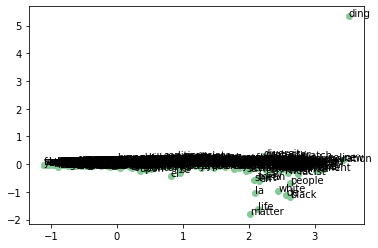

In [34]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color = '#88c999')
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 
https://github.com/sampath13579/INFO5731

